# Data_Science_Case_Study_-_Hard_Drives

#### Ted Thompson

In [512]:
#load packages for connecting and querying postgres database
import psycopg2
import sys, os
import numpy as np
import pandas as pd
import pandas.io.sql as psql
from time import time

In [513]:
PGHOST='35.233.240.51' 
PGDATABASE= 'postgres'
PGUSER='candidate'
PGPASSWORD='luuj'

In [514]:
# Database credentials
PGHOST='35.233.240.51' 
PGDATABASE= 'postgres'
PGUSER='candidate'
PGPASSWORD='luuj'

## ****** LOAD PSQL DATABASE ***** ##


# Set up a connection to the postgres server.
conn_string = "host="+ PGHOST +" port="+ "5432" +" dbname="+ PGDATABASE +" user=" + PGUSER \
+" password="+ PGPASSWORD
conn=psycopg2.connect(conn_string)
print("Connected!")

# Create a cursor object
cursor = conn.cursor()



def load_data(schema, table):
    
# slower alternative query
#     sql_command = """SELECT * 
#                     FROM {s}.{t}
#                     WHERE model in (
#                     SELECT DISTINCT model
#                     FROM (
#                     SELECT DISTINCT model, count(*) as c
#                     FROM {s}.{t}
#                     GROUP BY model
#                     ORDER BY c DESC
#                     LIMIT 10) as d );""".format(s=schema, t=table)
    
    sql_command = """SELECT a.* 
                    FROM {s}.{t} a JOIN (
                    SELECT model, count(*) as n
                    FROM {s}.{t}
                    GROUP BY model
                    ORDER BY n DESC
                    LIMIT 10) b
                    ON a.model=b.model;""".format(s=schema, t=table)
    print (sql_command)

    # Load the data
    data = pd.read_sql(sql_command, conn)

    print(data.shape)
    return (data)

Connected!


In [515]:
print("Query top 10 hard drive models.")
dat = load_data('public','hard_drive_stats')
display(dat.head())
display(dat.describe())
display(dat.info())
print(dat['model'].value_counts())

Query top 10 hard drive models.
SELECT a.* 
                    FROM public.hard_drive_stats a JOIN (
                    SELECT model, count(*) as n
                    FROM public.hard_drive_stats
                    GROUP BY model
                    ORDER BY n DESC
                    LIMIT 10) b
                    ON a.model=b.model;
(8658059, 20)


,row.names,date,serial_number,model,capacity_bytes,failure,read_error_rate,throughput_performance,spin_up_time,start_stop_count,reallocated_sector,seek_time_performance,power_on_hours,power_cycle_count,reported_uncorrect,command_timeout,high_fly_writes,airflow_temprature,load_cycle_count,total_lbas_written
0,6675676,2018-03-09,Z304LA9S,ST4000DM000,4000787030016,0,228441304,,0,10,0,,20161,10,0,0,0,23,12857,39725992376
1,6675677,2018-03-09,ZA12PV18,ST8000DM002,8001563222016,0,85926192,,0,3,0,,14070,3,0,0,0,35,2745,47458365784
2,6675678,2018-03-09,ZA13QBTD,ST8000DM002,8001563222016,0,191792608,,0,3,0,,11918,3,0,0,0,34,6224,43458531904
3,6675679,2018-03-09,ZCH06KW2,ST12000NM0007,12000138625024,0,106825256,,0,2,0,,3176,1,0,0,,23,203,30962549384
4,6675680,2018-03-09,ZA12PV11,ST8000DM002,8001563222016,0,18099488,,0,5,0,,14070,5,0,0,0,32,2800,47410391856


,failure
count,8.658059e+06
mean,3.314831e-05
std,5.757362e-03
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8658059 entries, 0 to 8658058
Data columns (total 20 columns):
row.names                 object
date                      object
serial_number             object
model                     object
capacity_bytes            object
failure                   int64
read_error_rate           object
throughput_performance    object
spin_up_time              object
start_stop_count          object
reallocated_sector        object
seek_time_performance     object
power_on_hours            object
power_cycle_count         object
reported_uncorrect        object
command_timeout           object
high_fly_writes           object
airflow_temprature        object
load_cycle_count          object
total_lbas_written        object
dtypes: int64(1), object(19)
memory usage: 1.3+ GB


None

ST4000DM000                2822282
HGST HMS5C4040BLE640       1363173
ST12000NM0007              1296465
ST8000NM0055               1293557
ST8000DM002                 888774
HGST HMS5C4040ALE640        505045
ST6000DX000                 169017
Hitachi HDS5C4040ALE630     115984
ST10000NM0086               109738
HGST HUH728080ALE600         94024
Name: model, dtype: int64


In [8]:
#(alternative slower)
# Top 10 most common hard drive models

# model_10 = dat['model'].value_counts()[:10].index.tolist()
# dat = dat.loc[dat['model'].isin(model_10)]
# dat['model'].value_counts()

ST4000DM000                2822282
HGST HMS5C4040BLE640       1363173
ST12000NM0007              1296465
ST8000NM0055               1293557
ST8000DM002                 888774
HGST HMS5C4040ALE640        505045
ST6000DX000                 169017
Hitachi HDS5C4040ALE630     115984
ST10000NM0086               109738
HGST HUH728080ALE600         94024
Name: model, dtype: int64

In [516]:
#make row names index
dat.set_index('row.names', inplace=True)
dat.shape

(8658059, 19)

In [206]:
#load packages
import missingno as msno
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

import pprint as pp
%matplotlib inline

import warnings

## Missing Values Analysis

The data has plenty of blank ('') spaces. I will be treating these as missing values.

In [52]:
#replace '' with NaN
dat.replace('', np.nan, inplace=True)
dat.head(50)

,row.names,date,serial_number,model,capacity_bytes,failure,read_error_rate,throughput_performance,spin_up_time,start_stop_count,reallocated_sector,seek_time_performance,power_on_hours,power_cycle_count,reported_uncorrect,command_timeout,high_fly_writes,airflow_temprature,load_cycle_count,total_lbas_written
0,6675676,2018-03-09,Z304LA9S,ST4000DM000,4000787030016,0,228441304,NaN,0,10,0,NaN,20161,10,0,0,0,23,12857,39725992376
1,6675677,2018-03-09,ZA12PV18,ST8000DM002,8001563222016,0,85926192,NaN,0,3,0,NaN,14070,3,0,0,0,35,2745,47458365784
2,6675678,2018-03-09,ZA13QBTD,ST8000DM002,8001563222016,0,191792608,NaN,0,3,0,NaN,11918,3,0,0,0,34,6224,43458531904
3,6675679,2018-03-09,ZCH06KW2,ST12000NM0007,12000138625024,0,106825256,NaN,0,2,0,NaN,3176,1,0,0,NaN,23,203,30962549384
4,6675680,2018-03-09,ZA12PV11,ST8000DM002,8001563222016,0,18099488,NaN,0,5,0,NaN,14070,5,0,0,0,32,2800,47410391856
5,6675681,2018-03-09,PL2331LAGN6TBJ,HGST HMS5C4040BLE640,4000787030016,0,0,104,553,20,0,41,33797,20,NaN,NaN,NaN,NaN,574,NaN
6,6675682,2018-03-09,Z3029ZY0,ST4000DM000,4000787030016,0,42011568,NaN,0,14,0,NaN,27346,14,0,1,0,22,42743,23624752353
7,6675683,2018-03-09,ZCH0C5K1,ST12000NM0007,12000138625024,0,130482144,NaN,0,2,0,NaN,1160,2,0,0,NaN,26,284,14844131360
8,6675684,2018-03-09,ZCH0C5K2,ST12000NM0007,12000138625024,0,150551400,NaN,0,1,0,NaN,1371,1,0,0,NaN,33,159,17847028616
9,6675685,2018-03-09,ZCH0BDZB,ST12000NM0007,12000138625024,0,37847456,NaN,0,2,0,NaN,1566,2,0,0,NaN,34,173,19117236120


The missing values correspond to the model variable. Next I will gernerate three dataframes and build a single type of model for each dataframe. This way there is a way of predicting a hard drive failure for every model 

In [53]:
dat1 = dat[dat['throughput_performance'].notnull()]
dat1.drop(columns=['reported_uncorrect','command_timeout','high_fly_writes','airflow_temprature','total_lbas_written'], inplace=True)
dat1.head()
print(dat1.shape)

(2078207, 15)


/Users/ted/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
dat2 = dat[dat['throughput_performance'].isnull()]
dat2.drop(columns=['throughput_performance', 'seek_time_performance'],inplace=True)
print(dat2.shape)

dat2.drop(columns=['high_fly_writes'], inplace=True)
dat2.dropna(inplace=True)
display(dat2.head())
print(dat2.shape)

/Users/ted/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(6579852, 18)


/Users/ted/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/ted/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,row.names,date,serial_number,model,capacity_bytes,failure,read_error_rate,spin_up_time,start_stop_count,reallocated_sector,power_on_hours,power_cycle_count,reported_uncorrect,command_timeout,airflow_temprature,load_cycle_count,total_lbas_written
0,6675676,2018-03-09,Z304LA9S,ST4000DM000,4000787030016,0,228441304,0,10,0,20161,10,0,0,23,12857,39725992376
1,6675677,2018-03-09,ZA12PV18,ST8000DM002,8001563222016,0,85926192,0,3,0,14070,3,0,0,35,2745,47458365784
2,6675678,2018-03-09,ZA13QBTD,ST8000DM002,8001563222016,0,191792608,0,3,0,11918,3,0,0,34,6224,43458531904
3,6675679,2018-03-09,ZCH06KW2,ST12000NM0007,12000138625024,0,106825256,0,2,0,3176,1,0,0,23,203,30962549384
4,6675680,2018-03-09,ZA12PV11,ST8000DM002,8001563222016,0,18099488,0,5,0,14070,5,0,0,32,2800,47410391856


(6579501, 17)


In [55]:
dat3 = dat[dat['throughput_performance'].isnull()]
dat3.drop(columns=['throughput_performance', 'seek_time_performance'],inplace=True)
dat3.dropna(inplace=True)
display(dat3.head())
print(dat3.shape)

/Users/ted/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ted/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,row.names,date,serial_number,model,capacity_bytes,failure,read_error_rate,spin_up_time,start_stop_count,reallocated_sector,power_on_hours,power_cycle_count,reported_uncorrect,command_timeout,high_fly_writes,airflow_temprature,load_cycle_count,total_lbas_written
0,6675676,2018-03-09,Z304LA9S,ST4000DM000,4000787030016,0,228441304,0,10,0,20161,10,0,0,0,23,12857,39725992376
1,6675677,2018-03-09,ZA12PV18,ST8000DM002,8001563222016,0,85926192,0,3,0,14070,3,0,0,0,35,2745,47458365784
2,6675678,2018-03-09,ZA13QBTD,ST8000DM002,8001563222016,0,191792608,0,3,0,11918,3,0,0,0,34,6224,43458531904
4,6675680,2018-03-09,ZA12PV11,ST8000DM002,8001563222016,0,18099488,0,5,0,14070,5,0,0,0,32,2800,47410391856
6,6675682,2018-03-09,Z3029ZY0,ST4000DM000,4000787030016,0,42011568,0,14,0,27346,14,0,1,0,22,42743,23624752353


(5283260, 18)


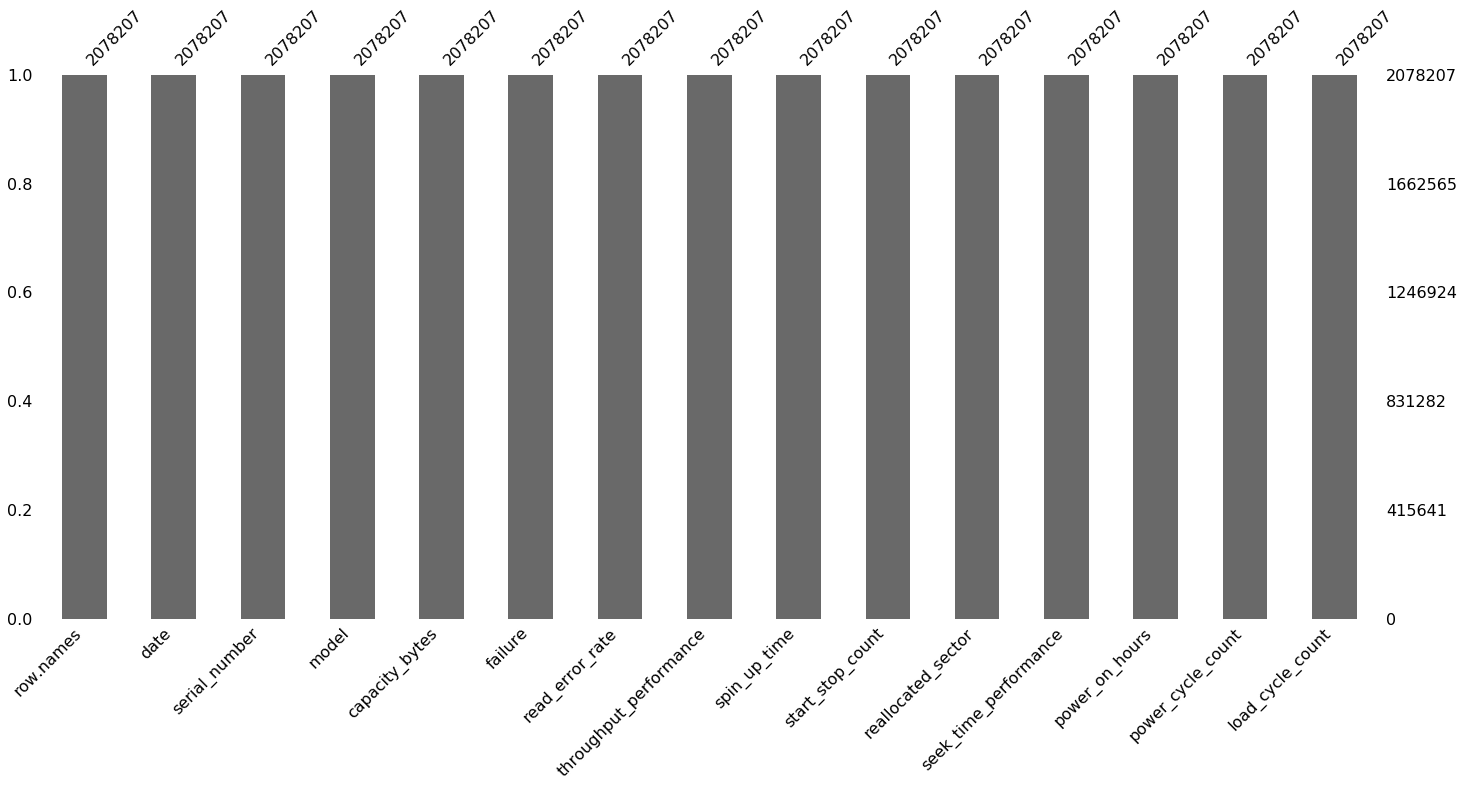

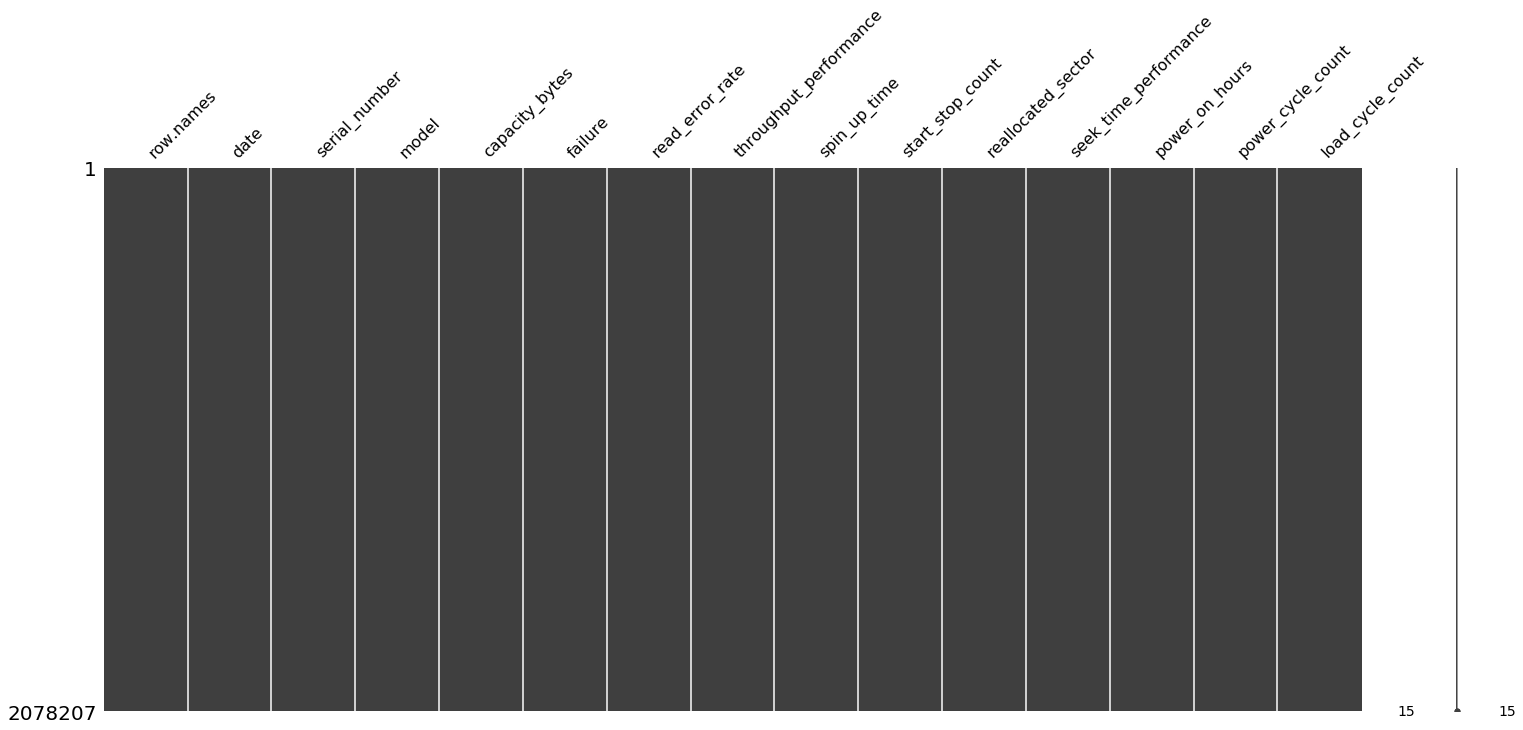

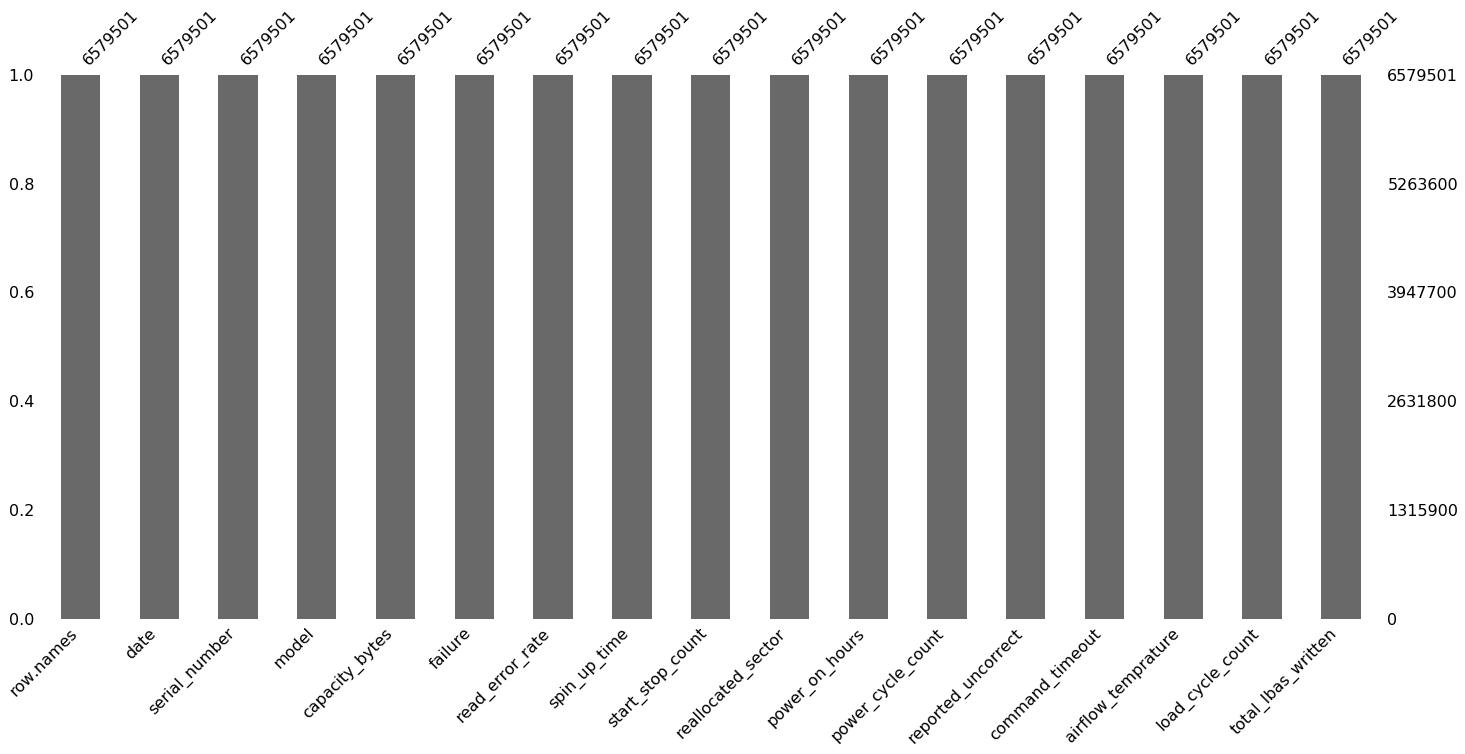

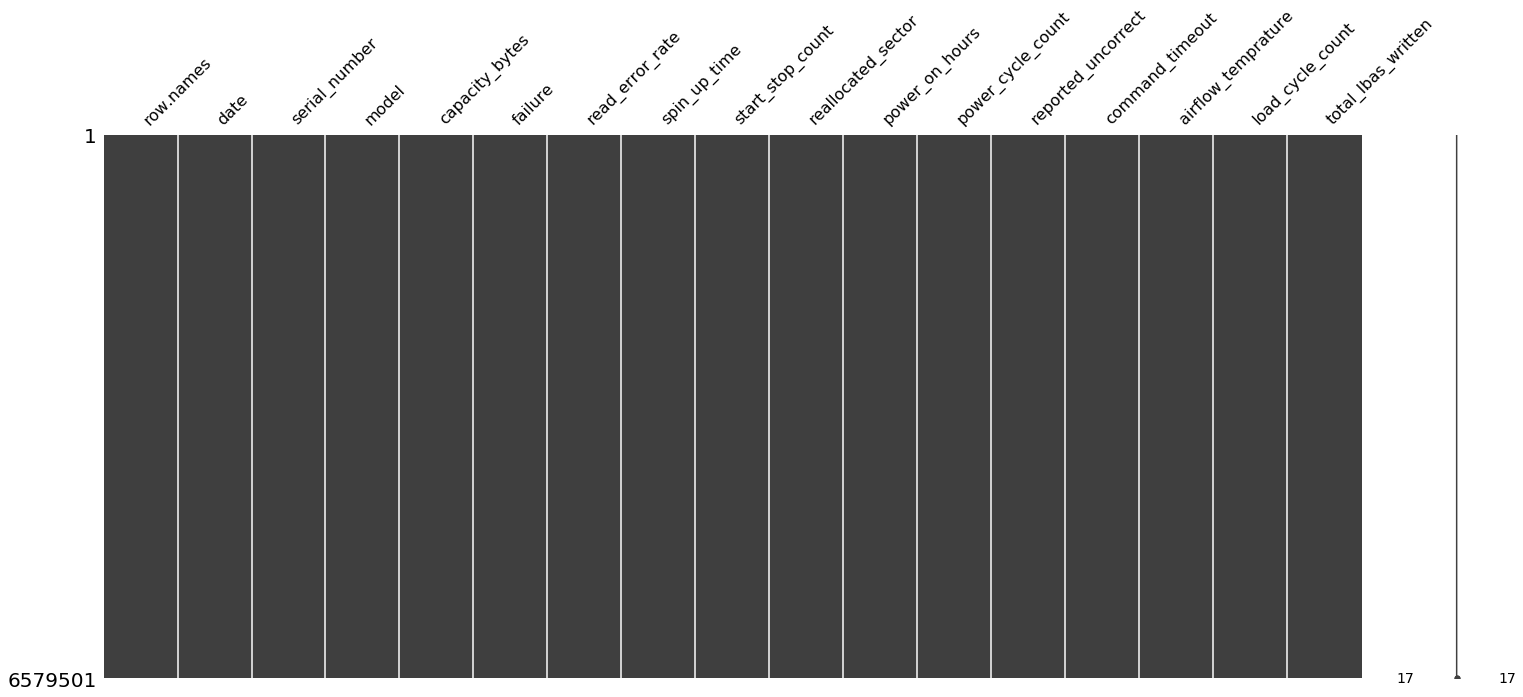

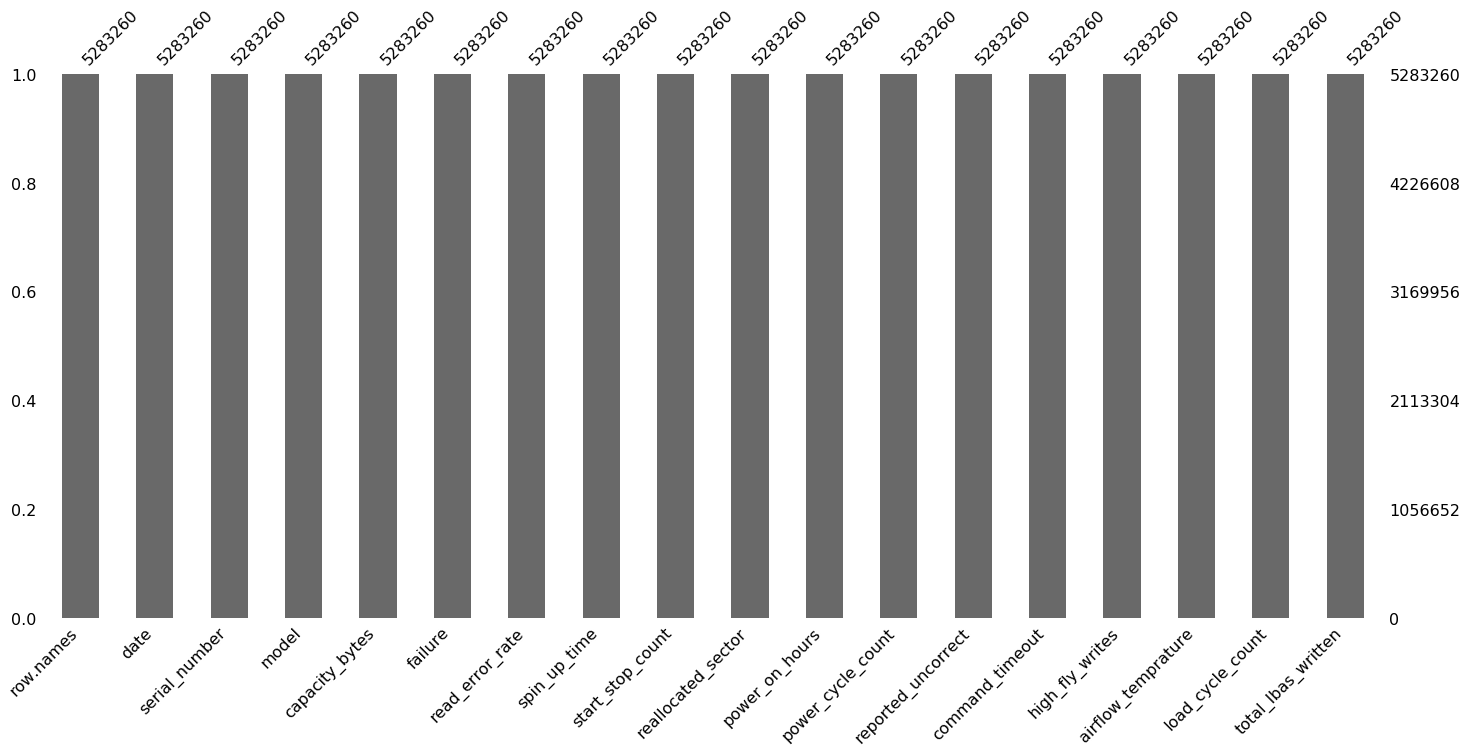

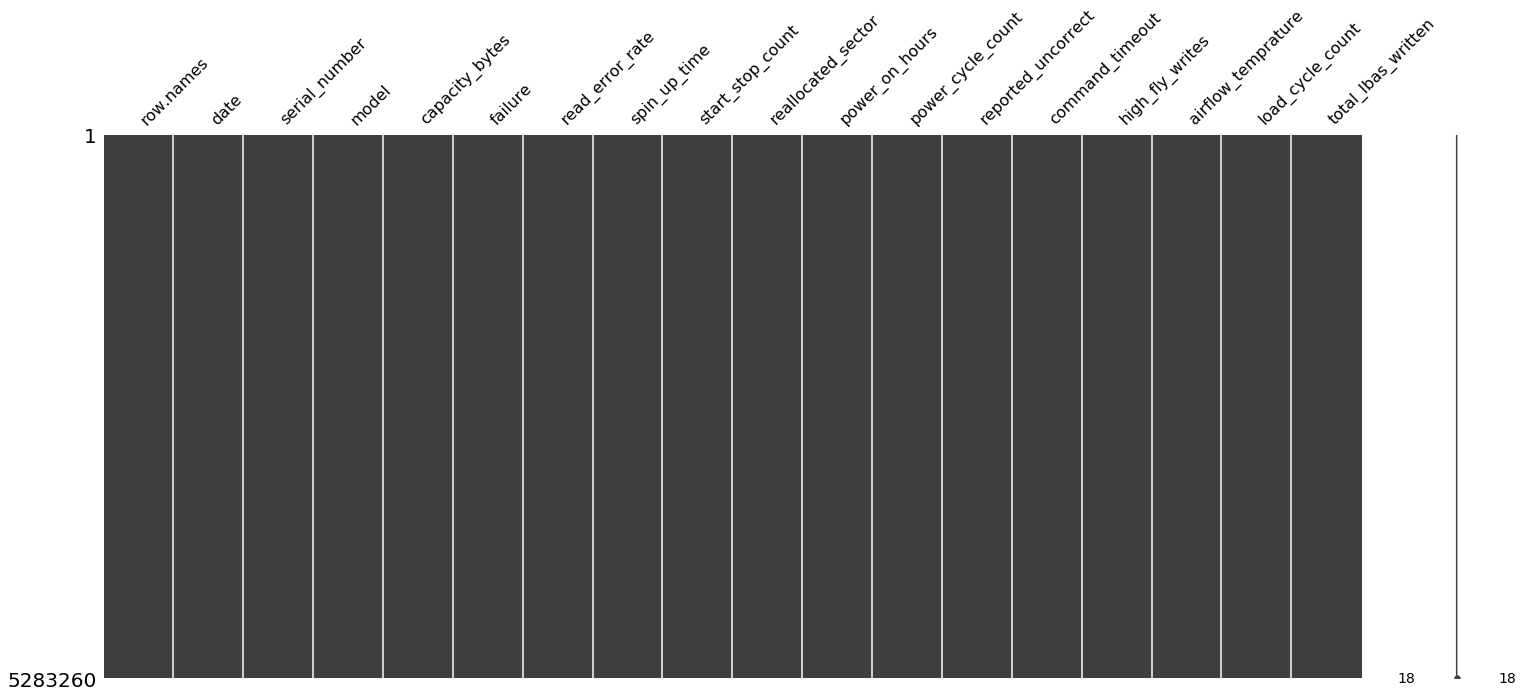

In [59]:
display(msno.bar(dat1))
display(msno.matrix(dat1))

display(msno.bar(dat2))
display(msno.matrix(dat2))

display(msno.bar(dat3))
display(msno.matrix(dat3))

# sd

In [60]:
display(dat1.failure.value_counts())
display(dat2.failure.value_counts())
display(dat3.failure.value_counts())

0    2078180
1         27
Name: failure, dtype: int64

0    6579242
1        259
Name: failure, dtype: int64

0    5283032
1        228
Name: failure, dtype: int64

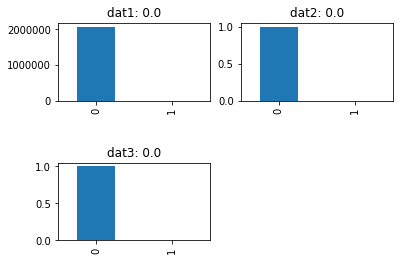

In [61]:
plt.subplot(2,2,1)
dat1.failure.value_counts().plot(kind='bar', title='Full Set')
plt.title("dat1: "+str(round(dat1.failure.value_counts(normalize=True)[1]*100)))

plt.subplot(2,2,2)
dat2.failure.value_counts(normalize=True).plot(kind='bar', title='Full Set')
plt.title("dat2: "+str(round(dat1.failure.value_counts(normalize=True)[1])))

plt.subplot(2,2,3)
dat3.failure.value_counts(normalize=True).plot(kind='bar', title='Full Set')
plt.title("dat3: "+str(round(dat1.failure.value_counts(normalize=True)[1])))

plt.subplots_adjust(hspace=0.8)
plt.show()

In [105]:
### set column types
coltype1 = {'serial_number': 'category', 'model': 'category', 'capacity_bytes': np.int64,'failure':np.uint8, 'read_error_rate':np.int64,
       'spin_up_time':np.int64, 'start_stop_count':np.int64, 'reallocated_sector':np.int64, 'seek_time_performance':np.int64, 
        'throughput_performance': np.int64, 'power_on_hours':np.int64,
       'power_cycle_count':np.int64, 'load_cycle_count':np.int64}

### set column types
coltype2 = {'serial_number': 'category', 'model': 'category', 'capacity_bytes': np.int64,'failure':np.uint8, 'read_error_rate':np.int64,
       'spin_up_time':np.int64, 'start_stop_count':np.int64, 'reallocated_sector':np.int64, 'power_on_hours':np.int64,
       'power_cycle_count':np.int64,  'reported_uncorrect':np.int64, 'command_timeout':np.int64,
       'airflow_temprature':np.int64, 'load_cycle_count':np.int64, 'total_lbas_written':np.int64}

### set column types
coltype3 = {'serial_number': 'category', 'model': 'category', 'capacity_bytes': np.int64,'failure':np.uint8, 'read_error_rate':np.int64,
       'spin_up_time':np.int64, 'start_stop_count':np.int64, 'reallocated_sector':np.int64, 'power_on_hours':np.int64,
       'power_cycle_count':np.int64,  'reported_uncorrect':np.int64, 'command_timeout':np.int64, 'high_fly_writes':np.int64,
       'airflow_temprature':np.int64, 'load_cycle_count':np.int64, 'total_lbas_written':np.int64}

In [64]:
dL = [dat1, dat2, dat3]
cL = [coltype1, coltype2, coltype3]

for d, coltype in zip(dL,cL):
    for i in coltype:
        print(i)
        d[i]=d[i].astype(coltype[i])
    #set time column type
    d['timestamp'] = pd.to_datetime(d['date'])
    # dates need to be converted for model
    d['date'] = d['timestamp'].astype(np.int64)
    print(d.info())

serial_number


/Users/ted/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


model
capacity_bytes
failure
read_error_rate
spin_up_time
start_stop_count
reallocated_sector
seek_time_performance
throughput_performance
power_on_hours
power_cycle_count
load_cycle_count
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078207 entries, 5 to 8658048
Data columns (total 15 columns):
row.names                 object
date                      object
serial_number             category
model                     category
capacity_bytes            int64
failure                   int64
read_error_rate           int64
throughput_performance    int64
spin_up_time              float64
start_stop_count          int64
reallocated_sector        int64
seek_time_performance     int64
power_on_hours            int64
power_cycle_count         int64
load_cycle_count          int64
dtypes: category(2), float64(1), int64(10), object(2)
memory usage: 228.7+ MB
None
serial_number
model
capacity_bytes
failure
read_error_rate
spin_up_time
start_stop_count
reallocated_sector
power_on_hours
po

In [204]:
display(dat1.head())
print(dat1.info())
display(dat2.head())
print(dat2.info())
display(dat3.head())
print(dat3.info())

,date,serial_number,capacity_bytes,failure,read_error_rate,throughput_performance,spin_up_time,start_stop_count,reallocated_sector,seek_time_performance,power_on_hours,power_cycle_count,load_cycle_count,model_HGST HMS5C4040ALE640,model_HGST HMS5C4040BLE640,model_HGST HUH728080ALE600,model_Hitachi HDS5C4040ALE630,timestamp
row.names,,,,,,,,,,,,,,,,,,
6675681,1520553600000000000,PL2331LAGN6TBJ,4000787030016,0,0,104,553,20,0,41,33797,20,574,0,1,0,0,2018-03-09
6675697,1520553600000000000,PL2331LAHDUVMJ,4000787030016,0,0,100,437,5,0,42,8625,5,200,0,1,0,0,2018-03-09
6675699,1520553600000000000,PL2331LAHAYA5J,4000787030016,0,0,101,0,3,0,42,15193,3,3,0,1,0,0,2018-03-09
6675701,1520553600000000000,PL1331LAHD3N5H,4000787030016,0,0,104,0,3,0,42,15368,3,3,0,1,0,0,2018-03-09
6675704,1520553600000000000,PL1331LAHD00SH,4000787030016,0,0,92,422,6,0,42,16161,6,104,0,1,0,0,2018-03-09


<class 'pandas.core.frame.DataFrame'>
Index: 2078207 entries, 6675681 to 6675665
Data columns (total 18 columns):
date                             int64
serial_number                    category
capacity_bytes                   int64
failure                          uint8
read_error_rate                  int64
throughput_performance           int64
spin_up_time                     int64
start_stop_count                 int64
reallocated_sector               int64
seek_time_performance            int64
power_on_hours                   int64
power_cycle_count                int64
load_cycle_count                 int64
model_HGST HMS5C4040ALE640       uint8
model_HGST HMS5C4040BLE640       uint8
model_HGST HUH728080ALE600       uint8
model_Hitachi HDS5C4040ALE630    uint8
timestamp                        datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(11), uint8(5)
memory usage: 220.8+ MB
None


,date,serial_number,capacity_bytes,failure,read_error_rate,spin_up_time,start_stop_count,reallocated_sector,power_on_hours,power_cycle_count,...,airflow_temprature,load_cycle_count,total_lbas_written,model_ST10000NM0086,model_ST12000NM0007,model_ST4000DM000,model_ST6000DX000,model_ST8000DM002,model_ST8000NM0055,timestamp
row.names,,,,,,,,,,,,,,,,,,,,,
6675676,1520553600000000000,Z304LA9S,4000787030016,0,228441304,0,10,0,20161,10,...,23,12857,39725992376,0,0,1,0,0,0,2018-03-09
6675677,1520553600000000000,ZA12PV18,8001563222016,0,85926192,0,3,0,14070,3,...,35,2745,47458365784,0,0,0,0,1,0,2018-03-09
6675678,1520553600000000000,ZA13QBTD,8001563222016,0,191792608,0,3,0,11918,3,...,34,6224,43458531904,0,0,0,0,1,0,2018-03-09
6675679,1520553600000000000,ZCH06KW2,12000138625024,0,106825256,0,2,0,3176,1,...,23,203,30962549384,0,1,0,0,0,0,2018-03-09
6675680,1520553600000000000,ZA12PV11,8001563222016,0,18099488,0,5,0,14070,5,...,32,2800,47410391856,0,0,0,0,1,0,2018-03-09


<class 'pandas.core.frame.DataFrame'>
Index: 6579501 entries, 6675676 to 6675675
Data columns (total 22 columns):
date                   int64
serial_number          category
capacity_bytes         int64
failure                uint8
read_error_rate        int64
spin_up_time           int64
start_stop_count       int64
reallocated_sector     int64
power_on_hours         int64
power_cycle_count      int64
reported_uncorrect     int64
command_timeout        int64
airflow_temprature     int64
load_cycle_count       int64
total_lbas_written     int64
model_ST10000NM0086    uint8
model_ST12000NM0007    uint8
model_ST4000DM000      uint8
model_ST6000DX000      uint8
model_ST8000DM002      uint8
model_ST8000NM0055     uint8
timestamp              datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(13), uint8(7)
memory usage: 1.1+ GB
None


,date,serial_number,capacity_bytes,failure,read_error_rate,spin_up_time,start_stop_count,reallocated_sector,power_on_hours,power_cycle_count,...,high_fly_writes,airflow_temprature,load_cycle_count,total_lbas_written,model_ST10000NM0086,model_ST4000DM000,model_ST6000DX000,model_ST8000DM002,model_ST8000NM0055,timestamp
row.names,,,,,,,,,,,,,,,,,,,,,
6675676,1520553600000000000,Z304LA9S,4000787030016,0,228441304,0,10,0,20161,10,...,0,23,12857,39725992376,0,1,0,0,0,2018-03-09
6675677,1520553600000000000,ZA12PV18,8001563222016,0,85926192,0,3,0,14070,3,...,0,35,2745,47458365784,0,0,0,1,0,2018-03-09
6675678,1520553600000000000,ZA13QBTD,8001563222016,0,191792608,0,3,0,11918,3,...,0,34,6224,43458531904,0,0,0,1,0,2018-03-09
6675680,1520553600000000000,ZA12PV11,8001563222016,0,18099488,0,5,0,14070,5,...,0,32,2800,47410391856,0,0,0,1,0,2018-03-09
6675682,1520553600000000000,Z3029ZY0,4000787030016,0,42011568,0,14,0,27346,14,...,0,22,42743,23624752353,0,1,0,0,0,2018-03-09


<class 'pandas.core.frame.DataFrame'>
Index: 5283260 entries, 6675676 to 6675675
Data columns (total 22 columns):
date                   int64
serial_number          category
capacity_bytes         int64
failure                uint8
read_error_rate        int64
spin_up_time           int64
start_stop_count       int64
reallocated_sector     int64
power_on_hours         int64
power_cycle_count      int64
reported_uncorrect     int64
command_timeout        int64
high_fly_writes        int64
airflow_temprature     int64
load_cycle_count       int64
total_lbas_written     int64
model_ST10000NM0086    uint8
model_ST4000DM000      uint8
model_ST6000DX000      uint8
model_ST8000DM002      uint8
model_ST8000NM0055     uint8
timestamp              datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(14), uint8(6)
memory usage: 698.3+ MB
None


In [84]:
for d in dL:
    print('*************')
    print(d.model.value_counts())

*************
HGST HMS5C4040BLE640       1363173
HGST HMS5C4040ALE640        505026
Hitachi HDS5C4040ALE630     115984
HGST HUH728080ALE600         94024
Name: model, dtype: int64
*************
ST4000DM000      2822270
ST12000NM0007    1296241
ST8000NM0055     1293502
ST8000DM002       888733
ST6000DX000       169017
ST10000NM0086     109738
Name: model, dtype: int64
*************
ST4000DM000      2822270
ST8000NM0055     1293502
ST8000DM002       888733
ST6000DX000       169017
ST10000NM0086     109738
Name: model, dtype: int64


In [85]:
display(dat1.serial_number.value_counts())

VKHAXE9X          90
PL1331LAHD59NH    90
PL1331LAHD588H    90
PL1331LAHD58AH    90
PL1331LAHD58BH    90
PL1331LAHD58GH    90
PL1331LAHD58HH    90
PL1331LAHD58JH    90
PL1331LAHD58KH    90
PL1331LAHD58MH    90
PL1331LAHD58NH    90
PL1331LAHD58PH    90
PL1331LAHD58RH    90
PL1331LAHD58TH    90
PL1331LAHD58WH    90
PL1331LAHD58XH    90
PL1331LAHD598H    90
PL1331LAHD599H    90
PL1331LAHD59JH    90
PL1331LAHD587H    90
PL1331LAHD586H    90
PL1331LAHD585H    90
PL1331LAHD57NH    90
PL1331LAHD579H    90
PL1331LAHD57BH    90
PL1331LAHD57EH    90
PL1331LAHD57GH    90
PL1331LAHD57KH    90
PL1331LAHD57LH    90
PL1331LAHD57MH    90
                  ..
PL1331LAGS1GVH     3
PL1331LAGS1GUH     3
PL1331LAGTVTMH     3
PL1331LAGSEGPH     3
PL1331LAGSEWEH     3
PL1331LAGSG2HH     3
PL1331LAGSG4TH     3
PL1331LAGSG57H     3
PL1331LAGTUWJH     3
PL1331LAGSHSJH     3
PL1331LAGTGW2H     3
PL1331LAGTH29H     3
PL1331LAGSM6DH     3
PL1331LAGSHM8H     3
PL1331LAGSHGSH     3
PL1331LAGTU7MH     3
PL1331LAGTU7V

In [96]:
# takes long time so will use LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dat1['serial_number'] = encoder.fit_transform(dat1['serial_number'])
dat2['serial_number'] = encoder.fit_transform(dat2['serial_number'])
dat3['serial_number'] = encoder.fit_transform(dat3['serial_number'])

dat1 = pd.get_dummies(dat1, columns=['model'])
dat2 = pd.get_dummies(dat2, columns=['model'])
dat3 = pd.get_dummies(dat3, columns=['model'])

# dates need to be converted for model
dat1['timestamp'] = pd.to_datetime(dat1['date'])
dat1['date'] = dat1['timestamp'].astype(np.int64)

dat2['timestamp'] = pd.to_datetime(dat2['date'])
dat2['date'] = dat2['timestamp'].astype(np.int64)

dat3['timestamp'] = pd.to_datetime(dat3['date'])
dat3['date'] = dat3['timestamp'].astype(np.int64)

#just incase
dat1.sort_values(by=['date'], inplace=True)
dat2.sort_values(by=['date'], inplace=True)
dat3.sort_values(by=['date'], inplace=True)

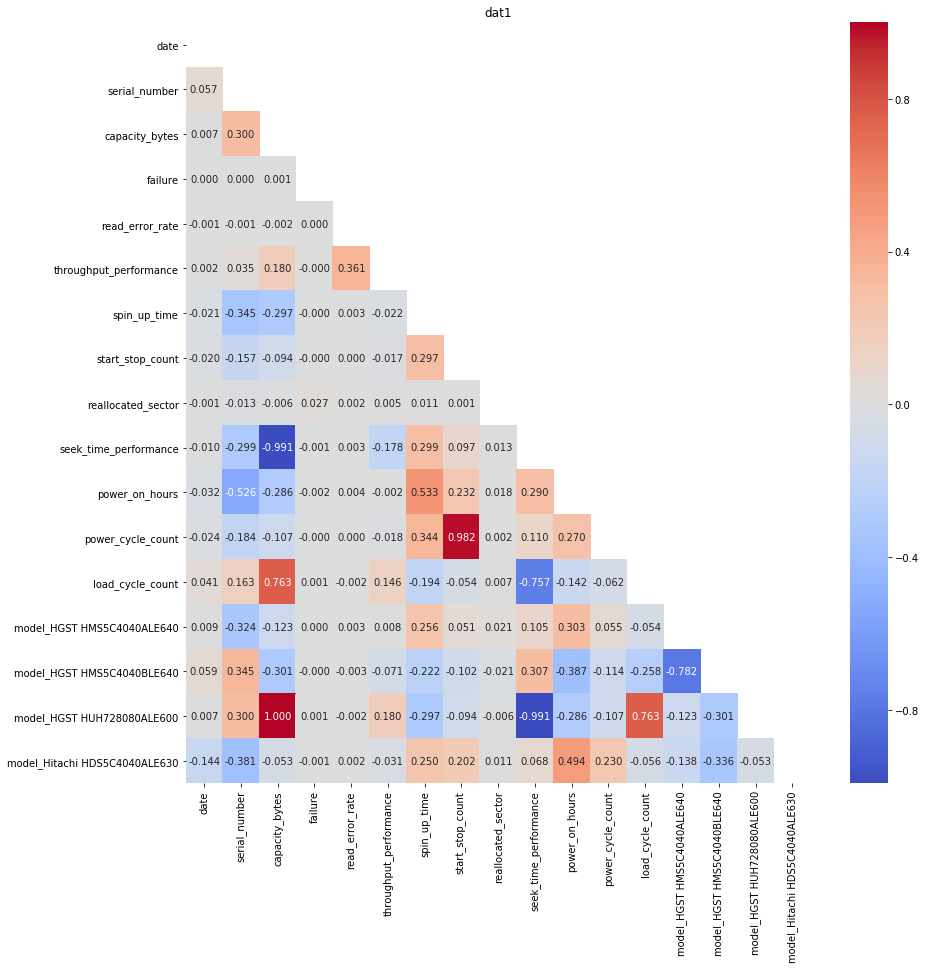

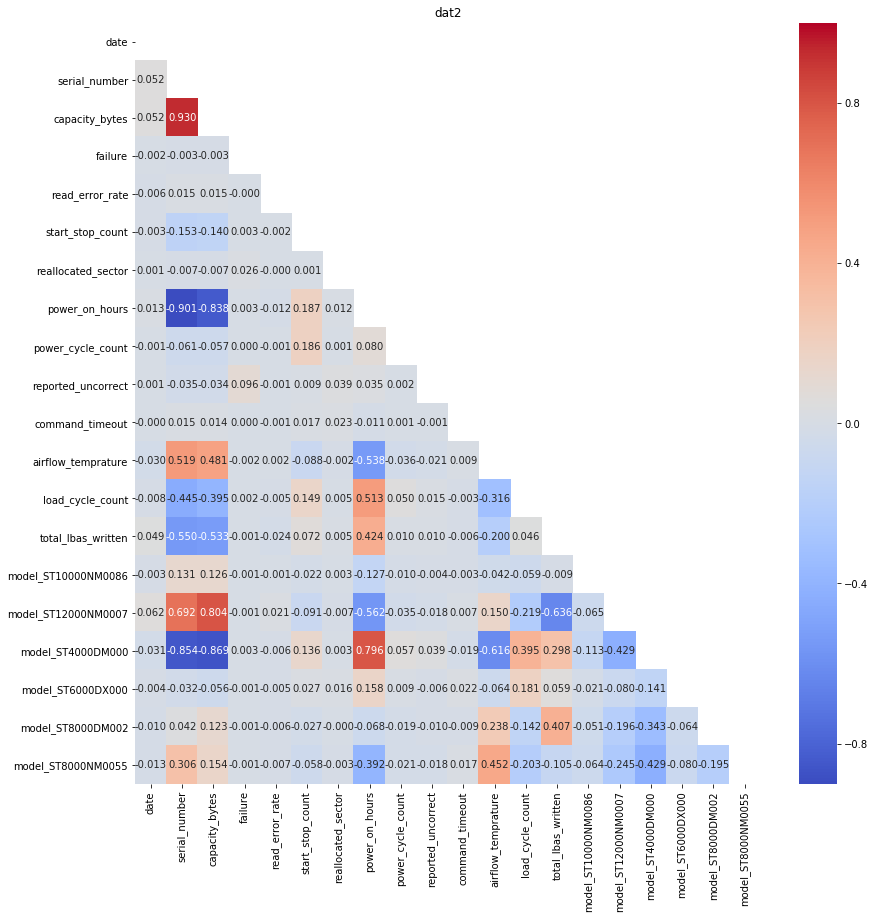

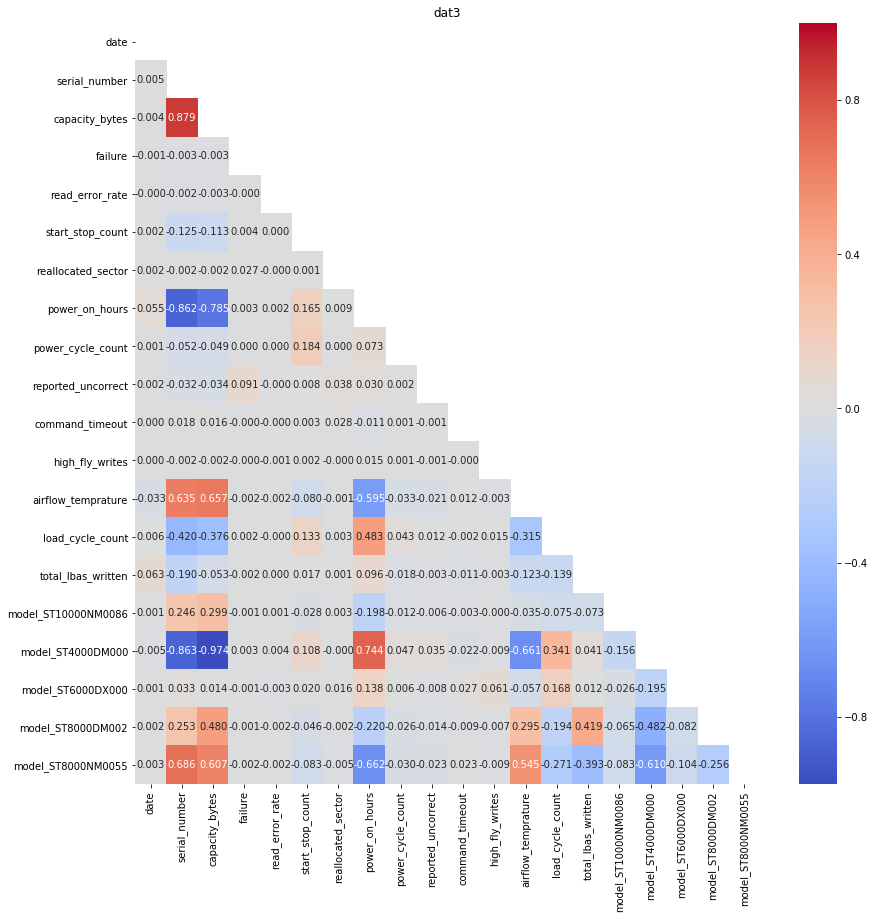

In [233]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_title('Dat1')
mask = np.zeros_like(dat1.corr())
mask[np.triu_indices_from(mask)] = 1
cmap = sns.diverging_palette(240, 10, sep=1, as_cmap=True)
sns.heatmap(dat1.corr(), mask= mask, ax= ax, annot= True, cmap='coolwarm', fmt='.3f')

fig, ax = plt.subplots(figsize=(14, 14))
ax.set_title('Dat2')
mask = np.zeros_like(dat2.corr())
mask[np.triu_indices_from(mask)] = 1
cmap = sns.diverging_palette(240, 10, sep=1, as_cmap=True)
sns.heatmap(dat2.corr(), mask= mask, ax= ax, annot= True, cmap='coolwarm', fmt='.3f')

fig, ax = plt.subplots(figsize=(14, 14))
ax.set_title('Dyat3')
mask = np.zeros_like(dat3.corr())
mask[np.triu_indices_from(mask)] = 1
cmap = sns.diverging_palette(240, 10, sep=1, as_cmap=True)
sns.heatmap(dat3.corr(), mask= mask, ax= ax, annot= True, cmap='coolwarm', fmt='.3f')

In [ ]:
display(dat2.spin_up_time.value_counts())
display(dat3.spin_up_time.value_counts())

In [212]:

dat2.drop(columns=['spin_up_time'], inplace=True)
dat3.drop(columns=['spin_up_time'], inplace=True)

# Preliminary Modelling

In [509]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import random
from time import time

In [299]:
#validation and testing set
d = dat2.sample(500000)
Xtrain, X_valid, ytrain, y_valid = train_test_split(d.drop(columns=['failure', 'timestamp']), d.failure, test_size=0.30)

#make sure both classes are in test and training set

print('Sample of target classes:')
display(d.failure.value_counts())
print('Training classes:')
display(ytrain.value_counts())
print('Validation classes:')
display(y_valid.value_counts())


0    499977
1        23
Name: failure, dtype: int64

0    349986
1        14
Name: failure, dtype: int64

0    149991
1         9
Name: failure, dtype: int64

### Hyperparameter Optimization

In [485]:
# Utility function to report best scores
def report(results, n_top=3, random_search=random_search, testy=testy):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
    probs = random_search.best_estimator_.predict_proba(X_valid)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # predict class values
    yhat = random_search.best_estimator_.predict(X_valid)
    # calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(testy, probs)
    # calculate F1 score
    f1 = f1_score(testy, yhat)
    # calculate precision-recall AUC
    au = auc(recall, precision)
    # calculate average precision score
    ap = average_precision_score(testy, probs)
    print('f1=%.3f auc=%.3f ap=%.3f' % (f1, au, ap))
    # plot no skill
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    # show the plot
    plt.show()
    print(classification_report(testy, yhat))
    print('Confusion Matrix')
    print(confusion_matrix(testy, yhat))
    print('')
    print('')

***************** RECALL *****************
RandomizedSearchCV took 32.66 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 3, 'max_features': 9, 'min_samples_split': 4}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 5, 'max_features': 11, 'min_samples_split': 19}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 4, 'max_features': 12, 'min_samples_split': 19}

f1=0.000 auc=0.003 ap=0.005


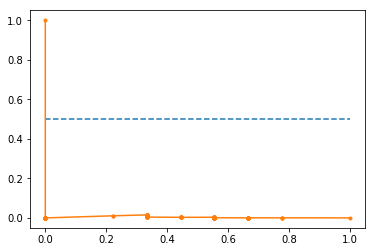

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149991
           1       0.00      0.00      0.00         9

    accuracy                           1.00    150000
   macro avg       0.50      0.50      0.50    150000
weighted avg       1.00      1.00      1.00    150000

Confusion Matrix
[[149991      0]
 [     9      0]]


***************** F1 *****************
RandomizedSearchCV took 25.86 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 1, 'max_features': 12, 'min_samples_split': 17}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 6, 'max_features': 13, 'min_samples_split': 9}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 5, 'max_features': 5, 'min_samples_split': 11}

f1=0.000 auc=0.012 ap=0.017


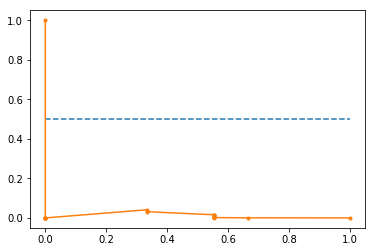

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149991
           1       0.00      0.00      0.00         9

    accuracy                           1.00    150000
   macro avg       0.50      0.50      0.50    150000
weighted avg       1.00      1.00      1.00    150000

Confusion Matrix
[[149991      0]
 [     9      0]]


***************** PRECISION *****************
RandomizedSearchCV took 23.24 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 2, 'max_features': 14, 'min_samples_split': 8}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 2, 'max_features': 4, 'min_samples_split': 4}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 4, 'max_features': 9, 'min_samples_split': 7}

f1=0.000 auc=0.004 ap=0.008


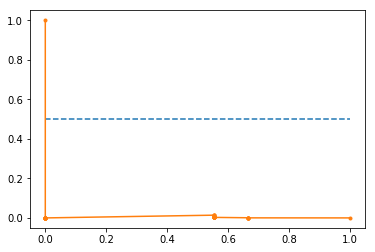

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149991
           1       0.00      0.00      0.00         9

    accuracy                           1.00    150000
   macro avg       0.50      0.50      0.50    150000
weighted avg       1.00      1.00      1.00    150000

Confusion Matrix
[[149991      0]
 [     9      0]]




In [301]:
warnings.filterwarnings('ignore')

model = RandomForestClassifier()
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {
              "max_depth": sp_randint(1, 7),
              "max_features": sp_randint(4, 15),
              "min_samples_split": sp_randint(3, 20)}
# run randomized search
n_iter_search = 10

for i in ['recall', 'f1', 'precision']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=3, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

***************** RECALL *****************
RandomizedSearchCV took 20.21 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.300 (std: 0.141)
Parameters: {'max_depth': 2, 'max_features': 4, 'min_samples_split': 12}

Model with rank: 2
Mean validation score: 0.167 (std: 0.236)
Parameters: {'max_depth': 3, 'max_features': 12, 'min_samples_split': 8}

Model with rank: 3
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 6, 'max_features': 7, 'min_samples_split': 11}

f1=0.000 auc=0.004 ap=0.004


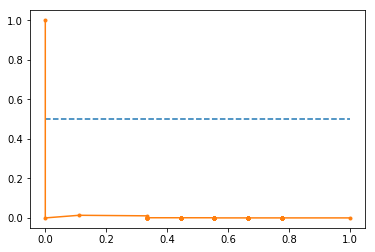

              precision    recall  f1-score   support

           0       1.00      0.45      0.62    149991
           1       0.00      0.67      0.00         9

    accuracy                           0.45    150000
   macro avg       0.50      0.56      0.31    150000
weighted avg       1.00      0.45      0.62    150000

Confusion Matrix
[[67184 82807]
 [    3     6]]


***************** F1 *****************
RandomizedSearchCV took 19.50 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 1, 'max_features': 6, 'min_samples_split': 15}

Model with rank: 2
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 6, 'max_features': 13, 'min_samples_split': 19}

Model with rank: 2
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 5, 'max_features': 10, 'min_samples_split': 14}

f1=0.000 auc=0.003 ap=0.003


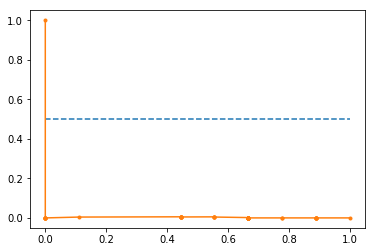

              precision    recall  f1-score   support

           0       1.00      0.00      0.00    149991
           1       0.00      1.00      0.00         9

    accuracy                           0.00    150000
   macro avg       0.50      0.50      0.00    150000
weighted avg       1.00      0.00      0.00    150000

Confusion Matrix
[[     3 149988]
 [     0      9]]


***************** PRECISION *****************
RandomizedSearchCV took 17.82 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 2, 'max_features': 7, 'min_samples_split': 14}

Model with rank: 2
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 4, 'max_features': 13, 'min_samples_split': 17}

Model with rank: 3
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 3, 'max_features': 6, 'min_samples_split': 6}

f1=0.000 auc=0.001 ap=0.001


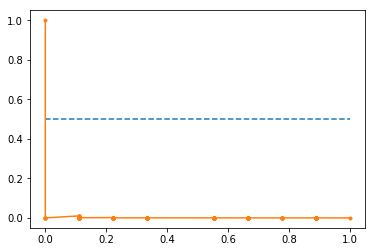

              precision    recall  f1-score   support

           0       1.00      0.48      0.65    149991
           1       0.00      0.78      0.00         9

    accuracy                           0.48    150000
   macro avg       0.50      0.63      0.32    150000
weighted avg       1.00      0.48      0.65    150000

Confusion Matrix
[[71621 78370]
 [    2     7]]




In [302]:
warnings.filterwarnings('ignore')

model = RandomForestClassifier(class_weight={0:.00001, 1:.99999})
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {
              "max_depth": sp_randint(1, 7),
              "max_features": sp_randint(4, 15),
              "min_samples_split": sp_randint(3, 20)}
# run randomized search
n_iter_search = 10

for i in ['recall', 'f1', 'precision']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=3, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

# Resampling

Using TensorFlow backend.


Shape of Training set before sampling: (350000, 19)
Proportion of failures=1: 4e-05

Shape of Training set after sampling: (699952, 19)
Proportion of install=1: 0.5


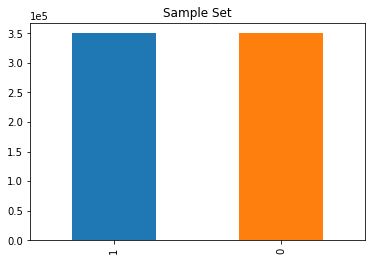

In [303]:
from imblearn.combine import SMOTETomek

print('Shape of Training set before sampling:', Xtrain.shape)
print('Proportion of failures=1:', np.mean(ytrain))
print('')
col = Xtrain.columns
idx = Xtrain.index

smt = SMOTETomek()
Xtrain, ytrain = smt.fit_sample(Xtrain, ytrain)

Xtrain = pd.DataFrame(Xtrain, columns=col, index=idx)
print('Shape of Training set after sampling:', Xtrain.shape)
print('Proportion of install=1:', np.mean(ytrain))

pd.Series(ytrain).value_counts().plot(kind='bar', title='Count (target)', stacked=True)
plt.title("Sample Set")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

display(d.failure.value_counts())
display(pd.Series(ytrain).value_counts())
display(y_valid.value_counts())

In [478]:
Feat = []
Feati = []

## Dat1

Sample of target classes:


0    749989
1        11
Name: failure, dtype: int64

Training classes:


0    524991
1         9
Name: failure, dtype: int64

Validation classes:


0    224998
1         2
Name: failure, dtype: int64

Shape of Training set before sampling: (525000, 16)
Proportion of failures=1: 0%

Shape of Training set after sampling: (1049976, 16)
Proportion of install=1: 50.0%


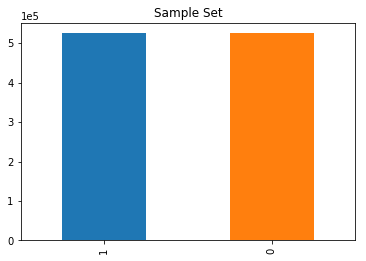

Sample of target classes:


0    749989
1        11
Name: failure, dtype: int64

Training classes:


1    524988
0    524988
dtype: int64

Validation classes:


0    224998
1         2
Name: failure, dtype: int64

In [483]:
#validation and testing set
d = dat1.sample(750000)
Xtrain, X_valid, ytrain, y_valid = train_test_split(d.drop(columns=['failure', 'timestamp']), d.failure, test_size=0.30)

#make sure both classes are in test and training set

print('Sample of target classes:')
display(d.failure.value_counts())
print('Training classes:')
display(ytrain.value_counts())
print('Validation classes:')
display(y_valid.value_counts())

################


print('Shape of Training set before sampling:', Xtrain.shape)
print('Proportion of failures=1:', str(round(np.mean(ytrain)*100)) + '%')
print('')
col = Xtrain.columns

Xtrain, ytrain = smt.fit_sample(Xtrain, ytrain)

Xtrain = pd.DataFrame(Xtrain, columns=col)
print('Shape of Training set after sampling:', Xtrain.shape)
print('Proportion of install=1:', str(np.mean(ytrain)*100) + '%')

pd.Series(ytrain).value_counts().plot(kind='bar', title='Count (target)', stacked=True)
plt.title("Sample Set")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

print('Sample of target classes:')
display(d.failure.value_counts())
print('Training classes:')
display(pd.Series(ytrain).value_counts())
print('Validation classes:')
display(y_valid.value_counts())


***************** RECALL *****************
RandomizedSearchCV took 72.23 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'max_depth': 5, 'min_samples_split': 0.7154776786311109}

Model with rank: 2
Mean validation score: 0.896 (std: 0.045)
Parameters: {'max_depth': 18, 'min_samples_split': 0.17324113997816337}

Model with rank: 3
Mean validation score: 0.732 (std: 0.042)
Parameters: {'max_depth': 19, 'min_samples_split': 0.404329358850792}

f1=0.000 auc=0.500 ap=0.000


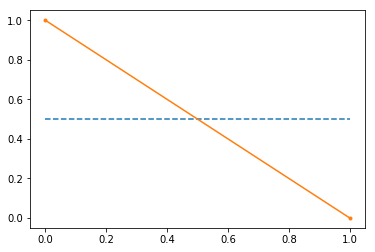

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    224998
           1       0.00      1.00      0.00         2

    accuracy                           0.00    225000
   macro avg       0.00      0.50      0.00    225000
weighted avg       0.00      0.00      0.00    225000

Confusion Matrix
[[     0 224998]
 [     0      2]]


***************** F1 *****************
RandomizedSearchCV took 69.55 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.875 (std: 0.030)
Parameters: {'max_depth': 16, 'min_samples_split': 0.3599945942195859}

Model with rank: 2
Mean validation score: 0.873 (std: 0.025)
Parameters: {'max_depth': 2, 'min_samples_split': 0.027016642186814877}

Model with rank: 3
Mean validation score: 0.866 (std: 0.031)
Parameters: {'max_depth': 19, 'min_samples_split': 0.22115246638620667}

f1=0.000 auc=0.000 ap=0.000


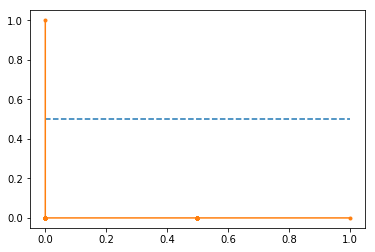

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    224998
           1       0.00      0.00      0.00         2

    accuracy                           0.95    225000
   macro avg       0.50      0.48      0.49    225000
weighted avg       1.00      0.95      0.98    225000

Confusion Matrix
[[214596  10402]
 [     2      0]]


***************** PRECISION *****************
RandomizedSearchCV took 107.63 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.987 (std: 0.003)
Parameters: {'max_depth': 11, 'min_samples_split': 0.14339623936855672}

Model with rank: 2
Mean validation score: 0.969 (std: 0.017)
Parameters: {'max_depth': 19, 'min_samples_split': 0.5054326042392334}

Model with rank: 3
Mean validation score: 0.968 (std: 0.017)
Parameters: {'max_depth': 8, 'min_samples_split': 0.23357388627738296}

f1=0.000 auc=0.000 ap=0.000


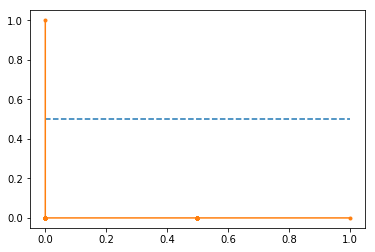

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    224998
           1       0.00      0.00      0.00         2

    accuracy                           1.00    225000
   macro avg       0.50      0.50      0.50    225000
weighted avg       1.00      1.00      1.00    225000

Confusion Matrix
[[224499    499]
 [     2      0]]




In [488]:
warnings.filterwarnings('ignore')

model = RandomForestClassifier()
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {
              "max_depth": sp_randint(1, 20),
              "min_samples_split": uniform(0,1)}
# run randomized search
n_iter_search = 10

for i in ['recall', 'f1', 'precision']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=3, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

dat1_model = random_search.best_estimator_
features = np.argsort(-random_search.best_estimator_.feature_importances_).tolist()
Feati.append(features)
Feat.append(Xtrain.columns[np.argsort(-random_search.best_estimator_.feature_importances_)].tolist())

cm1 = confusion_matrix(y_valid, random_search.best_estimator_.predict(X_valid))

### Dat2

Sample of target classes:


0    499976
1        24
Name: failure, dtype: int64

Training classes:


0    349980
1        20
Name: failure, dtype: int64

Validation classes:


0    149996
1         4
Name: failure, dtype: int64

Shape of Training set before sampling: (350000, 19)
Proportion of failures=1: 0.0%

Shape of Training set after sampling: (699930, 19)
Proportion of install=1: 50.0%


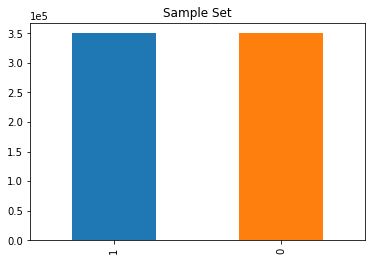

Sample of target classes:


0    499976
1        24
Name: failure, dtype: int64

Training classes:


1    349965
0    349965
dtype: int64

Validation classes:


0    149996
1         4
Name: failure, dtype: int64

In [489]:
#validation and testing set
d = dat2.sample(500000)
Xtrain, X_valid, ytrain, y_valid = train_test_split(d.drop(columns=['failure', 'timestamp']), d.failure, test_size=0.30)

#make sure both classes are in test and training set

print('Sample of target classes:')
display(d.failure.value_counts())
print('Training classes:')
display(ytrain.value_counts())
print('Validation classes:')
display(y_valid.value_counts())

################


print('Shape of Training set before sampling:', Xtrain.shape)
print('Proportion of failures=1:', str(round(np.mean(ytrain)*100)) + '%')
print('')
col = Xtrain.columns

Xtrain, ytrain = smt.fit_sample(Xtrain, ytrain)

Xtrain = pd.DataFrame(Xtrain, columns=col)
print('Shape of Training set after sampling:', Xtrain.shape)
print('Proportion of install=1:', str(np.mean(ytrain)*100)+'%')

pd.Series(ytrain).value_counts().plot(kind='bar', title='Count (target)', stacked=True)
plt.title("Sample Set")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

print('Sample of target classes:')
display(d.failure.value_counts())
print('Training classes:')
display(pd.Series(ytrain).value_counts())
print('Validation classes:')
display(y_valid.value_counts())


***************** RECALL *****************
RandomizedSearchCV took 73.45 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'max_depth': 19, 'min_samples_split': 0.6895827990506865}

Model with rank: 2
Mean validation score: 0.955 (std: 0.001)
Parameters: {'max_depth': 9, 'min_samples_split': 0.04003864650919409}

Model with rank: 3
Mean validation score: 0.854 (std: 0.038)
Parameters: {'max_depth': 5, 'min_samples_split': 0.07099027334208607}

f1=0.000 auc=0.500 ap=0.000


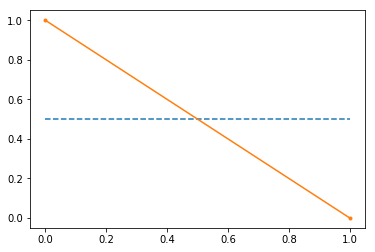

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    149996
           1       0.00      1.00      0.00         4

    accuracy                           0.00    150000
   macro avg       0.00      0.50      0.00    150000
weighted avg       0.00      0.00      0.00    150000

Confusion Matrix
[[     0 149996]
 [     0      4]]


***************** F1 *****************
RandomizedSearchCV took 108.87 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.942 (std: 0.003)
Parameters: {'max_depth': 15, 'min_samples_split': 0.06804853705641078}

Model with rank: 2
Mean validation score: 0.911 (std: 0.022)
Parameters: {'max_depth': 19, 'min_samples_split': 0.14475240687949187}

Model with rank: 3
Mean validation score: 0.905 (std: 0.007)
Parameters: {'max_depth': 19, 'min_samples_split': 0.12134610034762683}

f1=0.001 auc=0.000 ap=0.000


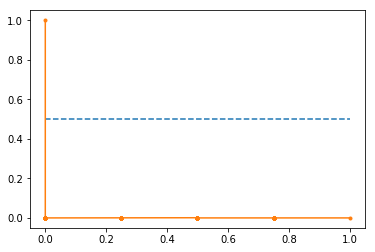

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    149996
           1       0.00      0.50      0.00         4

    accuracy                           0.98    150000
   macro avg       0.50      0.74      0.50    150000
weighted avg       1.00      0.98      0.99    150000

Confusion Matrix
[[146752   3244]
 [     2      2]]


***************** PRECISION *****************
RandomizedSearchCV took 53.94 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.970 (std: 0.009)
Parameters: {'max_depth': 17, 'min_samples_split': 0.2960380029263332}

Model with rank: 2
Mean validation score: 0.958 (std: 0.031)
Parameters: {'max_depth': 12, 'min_samples_split': 0.5123077165426758}

Model with rank: 3
Mean validation score: 0.856 (std: 0.076)
Parameters: {'max_depth': 8, 'min_samples_split': 0.4065191071904448}

f1=0.001 auc=0.000 ap=0.000


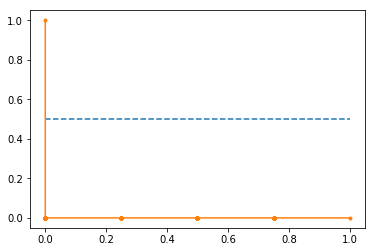

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    149996
           1       0.00      0.50      0.00         4

    accuracy                           0.97    150000
   macro avg       0.50      0.73      0.49    150000
weighted avg       1.00      0.97      0.98    150000

Confusion Matrix
[[144889   5107]
 [     2      2]]




In [490]:
warnings.filterwarnings('ignore')

model = RandomForestClassifier()
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {
              "max_depth": sp_randint(1, 20),
              "min_samples_split": uniform(0,1)}
# run randomized search
n_iter_search = 10

for i in ['recall', 'f1', 'precision']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=3, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

dat2_model = random_search.best_estimator_
features = np.argsort(-random_search.best_estimator_.feature_importances_).tolist()
Feati.append(features)
Feat.append(Xtrain.columns[np.argsort(-random_search.best_estimator_.feature_importances_)].tolist())

cm2 = confusion_matrix(y_valid, random_search.best_estimator_.predict(X_valid))

### Dat3

Sample of target classes:


0    499974
1        26
Name: failure, dtype: int64

Training classes:


0    349985
1        15
Name: failure, dtype: int64

Validation classes:


0    149989
1        11
Name: failure, dtype: int64

Shape of Training set before sampling: (350000, 19)
Proportion of failures=1: 0.0%

Shape of Training set after sampling: (699954, 19)
Proportion of install=1: 50.0%


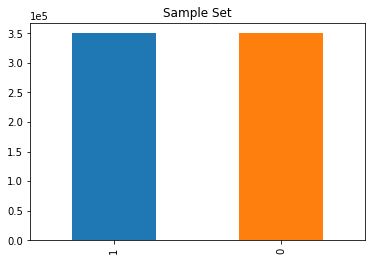

Sample of target classes:


0    499974
1        26
Name: failure, dtype: int64

Training classes:


1    349977
0    349977
dtype: int64

Validation classes:


0    149989
1        11
Name: failure, dtype: int64

In [491]:
#validation and testing set
d = dat3.sample(500000)
Xtrain, X_valid, ytrain, y_valid = train_test_split(d.drop(columns=['failure', 'timestamp']), d.failure, test_size=0.30)

#make sure both classes are in test and training set

print('Sample of target classes:')
display(d.failure.value_counts())
print('Training classes:')
display(ytrain.value_counts())
print('Validation classes:')
display(y_valid.value_counts())

################


print('Shape of Training set before sampling:', Xtrain.shape)
print('Proportion of failures=1:', str(round(np.mean(ytrain)*100)) + '%')
print('')
col = Xtrain.columns

Xtrain, ytrain = smt.fit_sample(Xtrain, ytrain)

Xtrain = pd.DataFrame(Xtrain, columns=col)
print('Shape of Training set after sampling:', Xtrain.shape)
print('Proportion of install=1:', str(np.mean(ytrain)*100)+'%')

pd.Series(ytrain).value_counts().plot(kind='bar', title='Count (target)', stacked=True)
plt.title("Sample Set")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

print('Sample of target classes:')
display(d.failure.value_counts())
print('Training classes:')
display(pd.Series(ytrain).value_counts())
print('Validation classes:')
display(y_valid.value_counts())


***************** RECALL *****************
RandomizedSearchCV took 44.44 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.906 (std: 0.030)
Parameters: {'max_depth': 8, 'min_samples_split': 0.3652822899831689}

Model with rank: 2
Mean validation score: 0.814 (std: 0.094)
Parameters: {'max_depth': 8, 'min_samples_split': 0.3777064630979179}

Model with rank: 3
Mean validation score: 0.798 (std: 0.029)
Parameters: {'max_depth': 7, 'min_samples_split': 0.3400800684567762}

f1=0.006 auc=0.049 ap=0.004


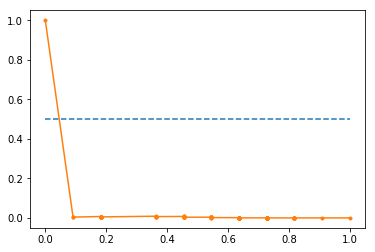

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    149989
           1       0.00      0.55      0.01        11

    accuracy                           0.99    150000
   macro avg       0.50      0.77      0.50    150000
weighted avg       1.00      0.99      0.99    150000

Confusion Matrix
[[147874   2115]
 [     5      6]]


***************** F1 *****************
RandomizedSearchCV took 55.30 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.966 (std: 0.010)
Parameters: {'max_depth': 5, 'min_samples_split': 0.12001751710491615}

Model with rank: 2
Mean validation score: 0.897 (std: 0.036)
Parameters: {'max_depth': 9, 'min_samples_split': 0.4351334931713057}

Model with rank: 3
Mean validation score: 0.878 (std: 0.018)
Parameters: {'max_depth': 15, 'min_samples_split': 0.578109731245268}

f1=0.001 auc=0.002 ap=0.003


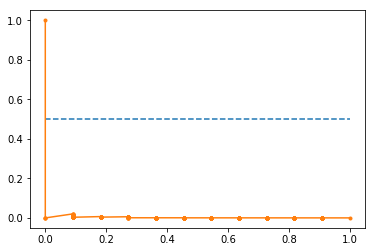

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    149989
           1       0.00      0.36      0.00        11

    accuracy                           0.96    150000
   macro avg       0.50      0.66      0.49    150000
weighted avg       1.00      0.96      0.98    150000

Confusion Matrix
[[143789   6200]
 [     7      4]]


***************** PRECISION *****************
RandomizedSearchCV took 54.87 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.985 (std: 0.002)
Parameters: {'max_depth': 8, 'min_samples_split': 0.4879797493599337}

Model with rank: 2
Mean validation score: 0.970 (std: 0.017)
Parameters: {'max_depth': 15, 'min_samples_split': 0.38938523431472116}

Model with rank: 3
Mean validation score: 0.954 (std: 0.002)
Parameters: {'max_depth': 6, 'min_samples_split': 0.14970725615079183}

f1=0.003 auc=0.002 ap=0.003


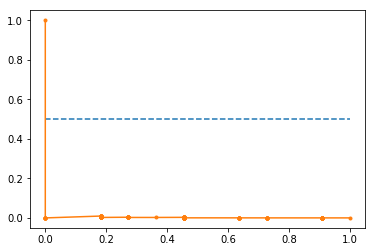

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    149989
           1       0.00      0.45      0.00        11

    accuracy                           0.98    150000
   macro avg       0.50      0.72      0.50    150000
weighted avg       1.00      0.98      0.99    150000

Confusion Matrix
[[146423   3566]
 [     6      5]]




In [492]:
warnings.filterwarnings('ignore')

model = RandomForestClassifier()
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {
              "max_depth": sp_randint(1, 20),
              "min_samples_split": uniform(0,1)}
# run randomized search
n_iter_search = 10

for i in ['recall', 'f1', 'precision']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=3, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

dat3_model = random_search.best_estimator_
features = np.argsort(-random_search.best_estimator_.feature_importances_).tolist()
Feati.append(features)
Feat.append(Xtrain.columns[np.argsort(-random_search.best_estimator_.feature_importances_)].tolist())

cm3 = confusion_matrix(y_valid, random_search.best_estimator_.predict(X_valid))

# Summary of Results

In [494]:
dfr = pd.DataFrame()
dfr['Dataframe'] = ['dat1','dat2','dat3']
dfr['Accuracy'] = [1,0.97,0.98 ]
dfr['Recall'] = [0,0.5,0.45]
dfr['Precision'] = [0,0,0]
dfr['F1'] = [0,0,0]
dfr['Selected features'] = Feat
dfr['Feature Idx'] = Feati
dfr['#Features'] = [len(val) for val in Feat]

dfr.set_index('Dataframe', inplace=True)

display(dfr)

,Accuracy,Recall,Precision,F1,Selected features,Feature Idx,#Features
Dataframe,,,,,,,
dat1,1.00,0.00,0,0,"[reallocated_sector, spin_up_time, power_on_ho...","[7, 5, 9, 3, 13, 6, 11, 0, 12, 1, 8, 4, 2, 15,...",16
dat2,0.97,0.50,0,0,"[reallocated_sector, capacity_bytes, model_ST4...","[5, 2, 15, 7, 8, 0, 6, 4, 11, 10, 17, 16, 14, ...",19
dat3,0.98,0.45,0,0,"[model_ST8000NM0055, reallocated_sector, repor...","[18, 5, 8, 2, 10, 17, 15, 11, 0, 3, 6, 4, 12, ...",19


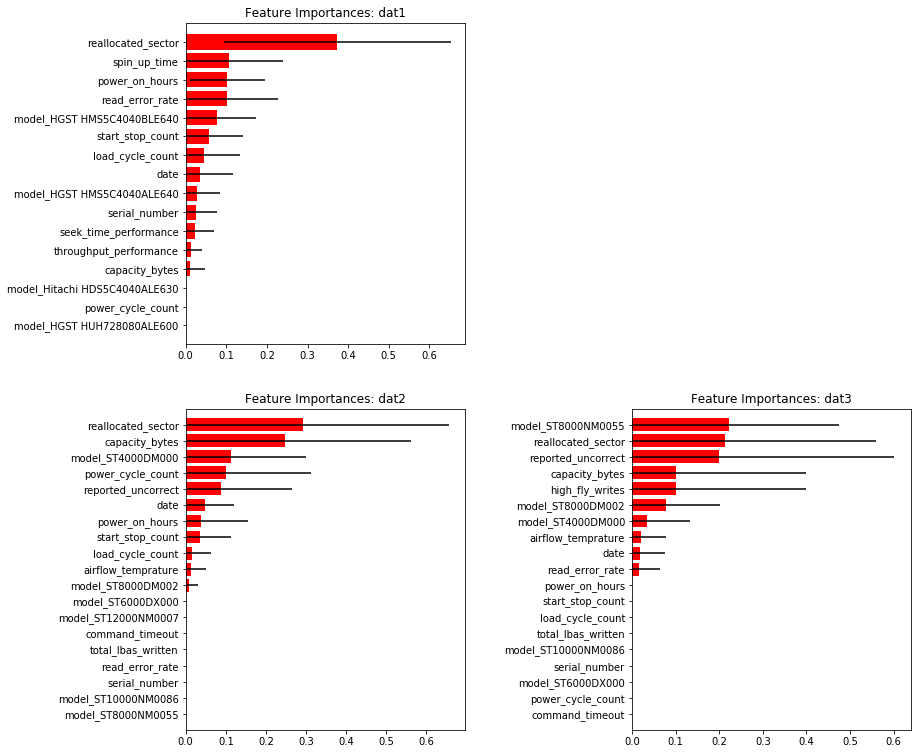

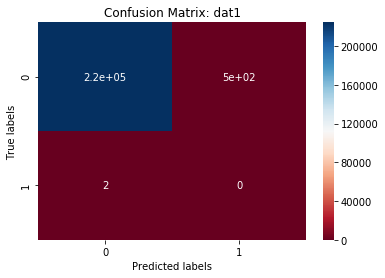

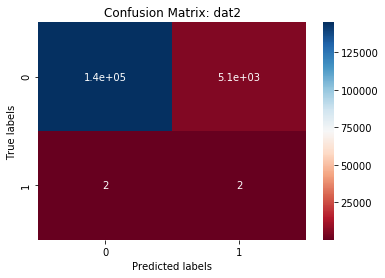

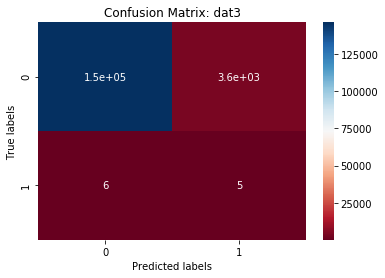

In [508]:
X = dat1.drop(columns=['failure', 'timestamp'])
forest = dat1_model
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(-importances)
feat_names = X.columns[indices]

plt.figure(figsize=(13,13))

plt.subplot(2,2,1)
plt.title("Feature Importances: dat1")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
plt.yticks(range(X.shape[1]), feat_names)
plt.ylim([-1, X.shape[1]])
plt.xlim(0,)
plt.gca().invert_yaxis()

###############
X = dat2.drop(columns=['failure', 'timestamp'])
forest = dat2_model
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(-importances)
feat_names = X.columns[indices]

plt.subplot(2,2,3)
plt.title("Feature Importances: dat2")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
plt.yticks(range(X.shape[1]), feat_names)
plt.ylim([-1, X.shape[1]])
plt.xlim(0,)
plt.gca().invert_yaxis()

#################
X = dat3.drop(columns=['failure', 'timestamp'])
forest = dat3_model
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(-importances)
feat_names = X.columns[indices]

plt.subplot(2,2,4)
plt.title("Feature Importances: dat3")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
plt.yticks(range(X.shape[1]), feat_names)
plt.ylim([-1, X.shape[1]])
plt.xlim(0,)
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0.6)
plt.show()

fig, ax = plt.subplots() 
sns.heatmap(cm1, annot=True, ax = ax, cmap='RdBu'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: dat1'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

fig, ax = plt.subplots() 
sns.heatmap(cm2, annot=True, ax = ax, cmap='RdBu'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: dat2'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

fig, ax = plt.subplots() 
sns.heatmap(cm3, annot=True, ax = ax, cmap='RdBu'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: dat3'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [511]:
joblib.dump(dat1_model,'dat1_model.pkl')
joblib.dump(dat2_model,'dat2_model.pkl')
joblib.dump(dat3_model,'dat3_model.pkl')

['dat3_model.pkl']

***************** RECALL *****************
RandomizedSearchCV took 163.42 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.923 (std: 0.012)
Parameters: {'max_depth': 5, 'max_features': 10, 'min_samples_split': 17}

Model with rank: 2
Mean validation score: 0.892 (std: 0.031)
Parameters: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 15}

Model with rank: 3
Mean validation score: 0.767 (std: 0.033)
Parameters: {'max_depth': 3, 'max_features': 9, 'min_samples_split': 12}

f1=0.000 auc=0.000 ap=0.000


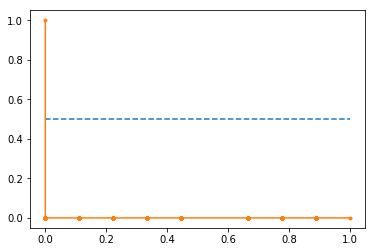

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    149991
           1       0.00      0.11      0.00         9

    accuracy                           0.96    150000
   macro avg       0.50      0.53      0.49    150000
weighted avg       1.00      0.96      0.98    150000

Confusion Matrix
[[143544   6447]
 [     8      1]]


***************** F1 *****************
RandomizedSearchCV took 214.68 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.954 (std: 0.010)
Parameters: {'max_depth': 6, 'max_features': 8, 'min_samples_split': 13}

Model with rank: 2
Mean validation score: 0.944 (std: 0.008)
Parameters: {'max_depth': 6, 'max_features': 5, 'min_samples_split': 6}

Model with rank: 3
Mean validation score: 0.942 (std: 0.006)
Parameters: {'max_depth': 6, 'max_features': 14, 'min_samples_split': 18}

f1=0.000 auc=0.000 ap=0.000


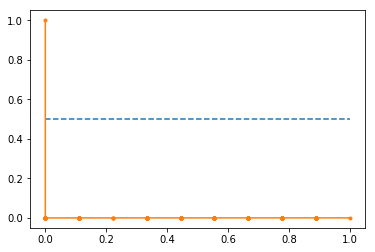

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    149991
           1       0.00      0.11      0.00         9

    accuracy                           0.96    150000
   macro avg       0.50      0.54      0.49    150000
weighted avg       1.00      0.96      0.98    150000

Confusion Matrix
[[144049   5942]
 [     8      1]]


***************** PRECISION *****************
RandomizedSearchCV took 147.06 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.981 (std: 0.002)
Parameters: {'max_depth': 1, 'max_features': 12, 'min_samples_split': 6}

Model with rank: 2
Mean validation score: 0.976 (std: 0.004)
Parameters: {'max_depth': 6, 'max_features': 5, 'min_samples_split': 7}

Model with rank: 3
Mean validation score: 0.952 (std: 0.004)
Parameters: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 5}

f1=0.007 auc=0.002 ap=0.002


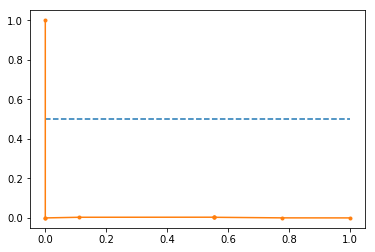

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    149991
           1       0.00      0.56      0.01         9

    accuracy                           0.99    150000
   macro avg       0.50      0.77      0.50    150000
weighted avg       1.00      0.99      1.00    150000

Confusion Matrix
[[148598   1393]
 [     4      5]]




In [ ]:
warnings.filterwarnings('ignore')

model = RandomForestClassifier()
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {
              "max_depth": sp_randint(1, 7),
              "max_features": sp_randint(4, 15),
              "min_samples_split": sp_randint(3, 20)}
# run randomized search
n_iter_search = 10

for i in ['recall', 'f1', 'precision']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=3, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)